## Hyperparameter Tuning for kNN for Predicting Heart Disease

1. Import "heart.csv".

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving heart.csv to heart.csv


2. Import Library

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

3. Load the Dataset into a frame

In [ ]:
df=pd.read_csv('/content/heart.csv')

4. Print the description, dimensions and first five records of the frame.

In [ ]:
print(df.info())
print(df.shape)
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
(303, 14)
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0      

5. Check whether the data has any  missing value in any column.

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

6. Check whether the data has balanced class distribution. Class target = 0 indicates "Heart Disease" and target = 1 indicates "No Heart Disease".

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


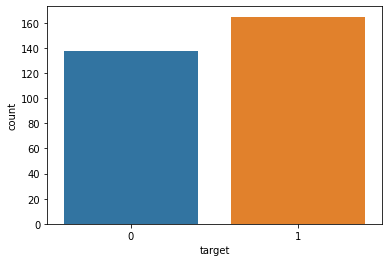

In [ ]:
sns.countplot(df['target'])

7. Create input features X, target Y, classifier object, train-test-split using 80-20% split

In [ ]:
x= df.drop(columns=['target'])
y=df['target']
knn=KNeighborsClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

8. Train model

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

9. Validate model on test set

In [ ]:
y_pred=knn.predict(x_test)

10. Print Classification Report on test data

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.48      0.52      0.50        25
           1       0.65      0.61      0.63        36

    accuracy                           0.57        61
   macro avg       0.56      0.57      0.56        61
weighted avg       0.58      0.57      0.58        61



11. Print AUC score on test data

In [ ]:
roc_auc_score(y_test,y_pred)

0.5655555555555556

The performance of the model is vey poor. Hence hyperparameters of kNN to be tuned using GridSearchCV.

12. Hyperparameter tuning using GridSearchCV. Set the parameters a)leaf-size= 1 to 15, b)n_neighbors = 1 to 10 and c) distance metric, p = 1, 2. When p =1 its Manhattan and p = 2 its Euclidean distance. GridSearchCV uses CV to search for the optimal values of the hyperparameters. It accepts the hyperparameters as a dictionary.  

In [ ]:
leaf_size=list(range(1,15))
n_neighbors=list(range(1,12))
p=[1,2]
hyperparameters=dict(leaf_size=leaf_size,n_neighbors=n_neighbors,p=p)

13. Train a new kNN model using GridSearchCV.

In [ ]:
knn_2=KNeighborsClassifier()
clf=GridSearchCV(knn_2,hyperparameters,cv=10,scoring='roc_auc')
best_model=clf.fit(x,y)

14. Print the best values of the hyperparameters.

In [ ]:
print(best_model)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                         'p': [1, 2]},
             scoring='roc_auc')


15. Validate the model on test data

In [ ]:
y_pred = best_model.predict(x_test)

16. Print classification report and AUC score of the model on test data

In [ ]:
print('Best leaf_size:',best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:',best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:',best_model.best_estimator_.get_params()['n_neighbors'])
print('Best Score:',best_model.best_score_)

Best leaf_size: 9
Best p: 1
Best n_neighbors: 7
Best Score: 0.7483536683904332
